<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">             <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>Armin Ghasemi</b><br><br>810100198</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b> computer vision </b><br><br>HW_2</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>  </b><br><br></i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
           </tr>
        </table>
    </div>
</div>


# Captcha Image Generation and Distortion

## 1. What We Did
We started by generating 10 basic Captcha images with random text. Then, to make them harder to read, we applied two processing steps:

* **Salt & Pepper Noise:** We added random black and white dots all over the image.
* **Blur:** After adding the noise, we made the noisy image "fuzzy" or "blurry."

This gave us three sets of images to work with: **Original**, **Noisy**, and **Noisy + Blur**.

## 2. Why We Did This
The main goal of a Captcha is to be **easy for a human** but **hard for a computer (a bot)**.

A computer program can easily read clean, simple text. By adding noise and blur, we **distort** the image. These distortions "break" the clean shapes of the letters, which confuses the computer bots.

A human, however, can easily look past the noise and blur to see the real letters. This is how we stop bots while letting people through.

Input path: ./assets/Captcha
Salt & Pepper output path: ./outputs/Captcha_SaltPepper
Blur output path: ./outputs/Captcha_SaltPepper_Blur

Processing 10 images...
Processing complete. All images saved.

Displaying results...


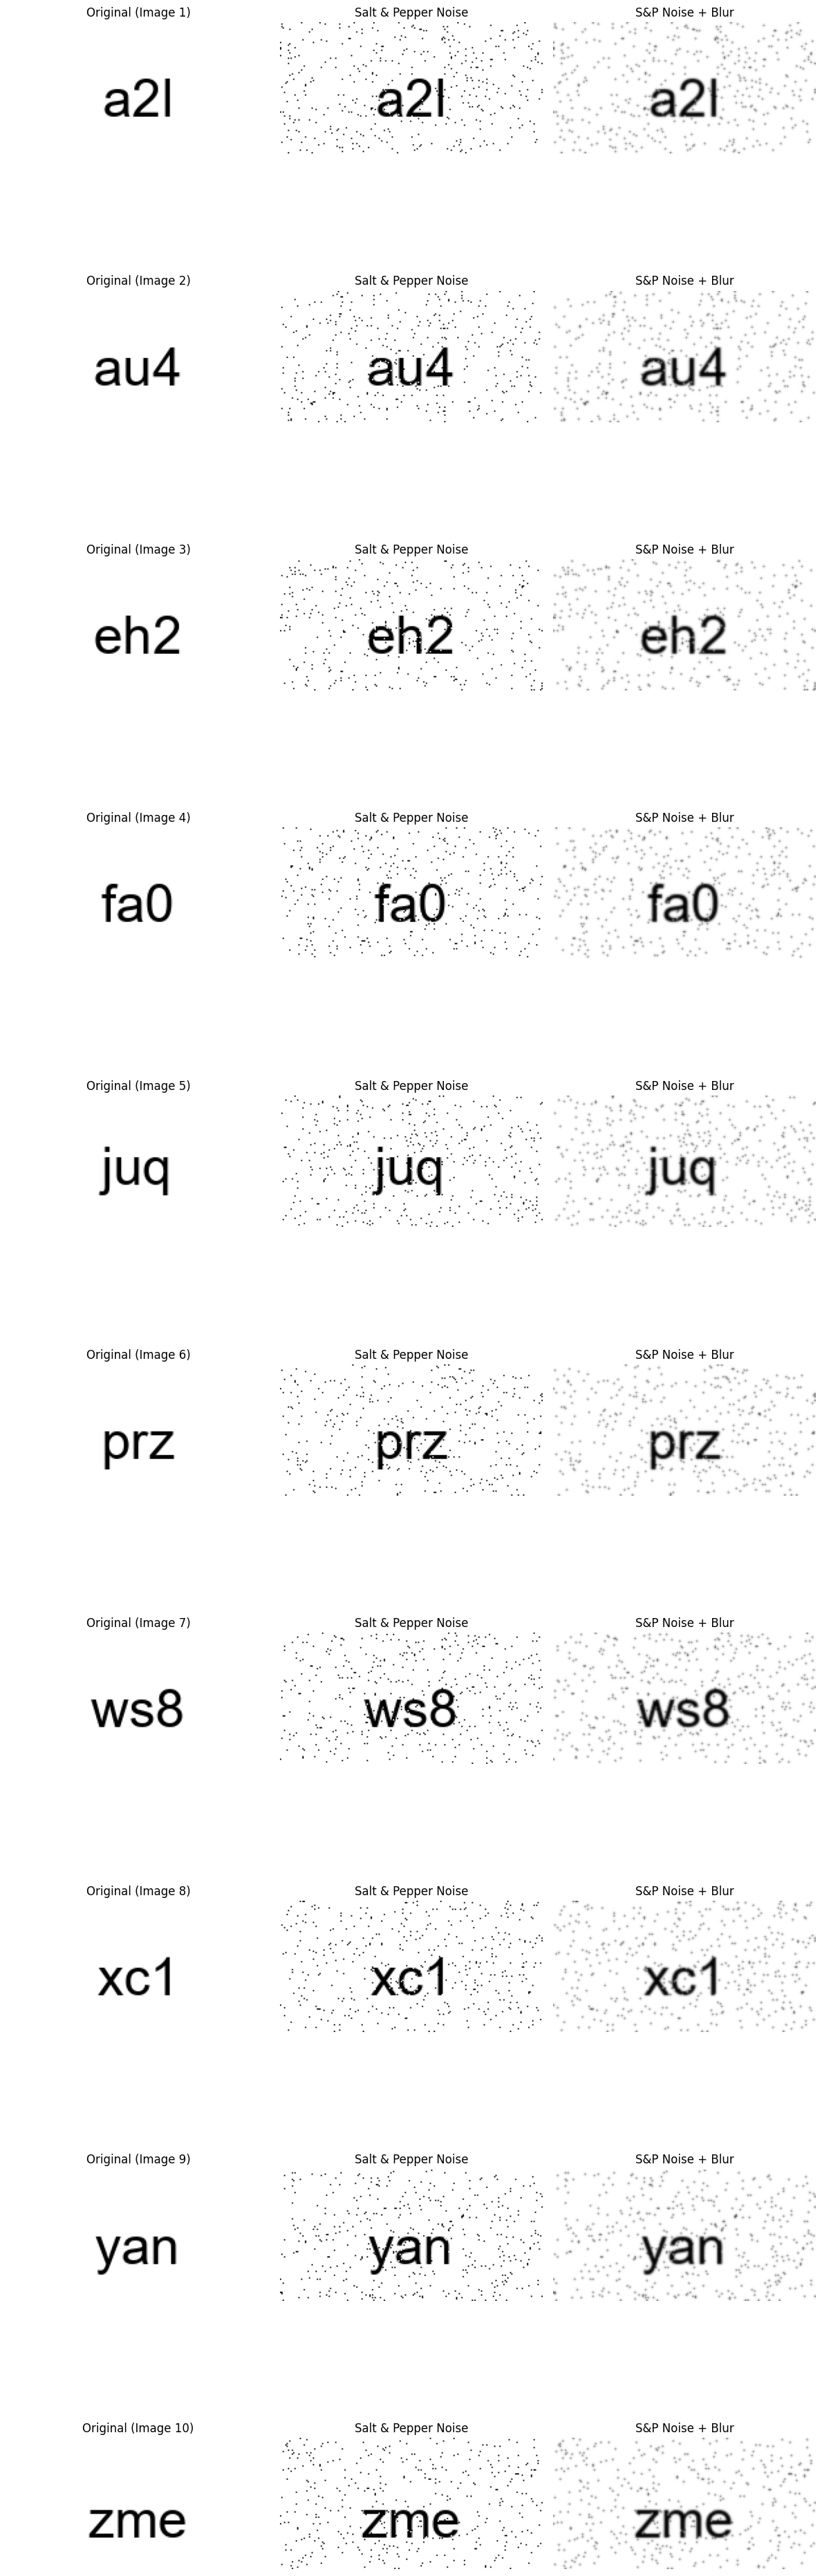

In [1]:
import os
import glob
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 2. Define Paths and Create Output Directories
# ---------------------------------------------------

BASE_DIR = '.'

INPUT_DIR = os.path.join(BASE_DIR, 'assets', 'Captcha')

OUTPUT_BASE = os.path.join(BASE_DIR, 'outputs')
OUTPUT_DIR_SP = os.path.join(OUTPUT_BASE, 'Captcha_SaltPepper')
OUTPUT_DIR_BLUR = os.path.join(OUTPUT_BASE, 'Captcha_SaltPepper_Blur')

os.makedirs(OUTPUT_DIR_SP, exist_ok=True)
os.makedirs(OUTPUT_DIR_BLUR, exist_ok=True)

print(f"Input path: {INPUT_DIR}")
print(f"Salt & Pepper output path: {OUTPUT_DIR_SP}")
print(f"Blur output path: {OUTPUT_DIR_BLUR}")

# Check if input directory exists
if not os.path.exists(INPUT_DIR):
    print(f"WARNING: Input directory not found at {INPUT_DIR}")
    print("Please make sure you have created 'assets/Captcha' and put .png files in it.")

# ---------------------------------------------------
# 3. Salt & Pepper Noise Function
# ---------------------------------------------------
def add_salt_pepper_noise(pil_img, prob=0.05):
    """
    Adds salt & pepper noise to a PIL image.
    prob: The probability that a pixel will be affected by noise.
    """
    img_arr = np.array(pil_img)

    if len(img_arr.shape) == 3:
        h, w, c = img_arr.shape
        rnd = np.random.rand(h, w)
        img_arr[rnd < prob / 2] = [255, 255, 255]
        img_arr[(rnd >= prob / 2) & (rnd < prob)] = [0, 0, 0]
    else:
        h, w = img_arr.shape
        rnd = np.random.rand(h, w)
        img_arr[rnd < prob / 2] = 255
        img_arr[(rnd >= prob / 2) & (rnd < prob)] = 0

    return Image.fromarray(img_arr)

# ---------------------------------------------------
# 4. Main Processing: Read, Apply Noise & Filter, Save
# ---------------------------------------------------
image_paths = sorted(glob.glob(os.path.join(INPUT_DIR, '*.png')))
images_to_display = []

print(f"\nProcessing {len(image_paths)} images...")

for img_path in image_paths:
    filename = os.path.basename(img_path)

    # 1. Read
    original_img = Image.open(img_path)

    # 2. Apply S&P noise
    sp_img = add_salt_pepper_noise(original_img, prob=0.04)

    # 3. Save S&P
    sp_img.save(os.path.join(OUTPUT_DIR_SP, filename))

    # 4. Apply Blur
    blur_img = sp_img.filter(ImageFilter.GaussianBlur(radius=0.7))

    # 5. Save Blur
    blur_img.save(os.path.join(OUTPUT_DIR_BLUR, filename))

    # 6. Add to display list
    images_to_display.append((original_img, sp_img, blur_img))

if len(images_to_display) > 0:
    print("Processing complete. All images saved.")
else:
    print("Processing complete. No images were found to process.")


# ---------------------------------------------------
# 5. Display Results Side-by-Side
# ---------------------------------------------------
print("\nDisplaying results...")

num_images = len(images_to_display)

# --- IMPORTANT CHECK ---
# Only try to create a plot if we actually processed any images
if num_images > 0:
    fig, axes = plt.subplots(num_images, 3, figsize=(12, num_images * 4))

    if num_images == 1:
        axes = np.array([axes])

    for i, (orig, sp, blur) in enumerate(images_to_display):
        # Original
        axes[i, 0].imshow(orig)
        axes[i, 0].set_title(f'Original (Image {i+1})')
        axes[i, 0].axis('off')

        # S&P
        axes[i, 1].imshow(sp)
        axes[i, 1].set_title('Salt & Pepper Noise')
        axes[i, 1].axis('off')

        # S&P + Blur
        axes[i, 2].imshow(blur)
        axes[i, 2].set_title('S&P Noise + Blur')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images were found to display.")

# Image Denoising and Sharpening

## 1. How "Blur" Filters Remove Noise
Most "blur" filters (like a **Mean Filter**) work by looking at a pixel and its neighbors, then replacing the pixel's value with the **average** of that neighborhood.

If you have a single random "Salt" (white) noise pixel, averaging it with its normal neighbors will "tone it down" and make it blend in. The downside is this averaging action blurs *everything*, including the sharp edges of the letters we want to keep.

### Why We Used a Median Filter
A **Median Filter** is a smarter way to remove noise, especially **Salt & Pepper** noise.

Instead of averaging, it gathers all the pixel values in a neighborhood, **sorts** them, and picks the **middle value (the median)**.
* **Example:** `[120, 122, 125, 128, 255]`
* **Average:** 150 (a gray smudge)
* **Median:** 125 (the original pixel value)

The filter sees the extreme white (255) and black (0) noise dots as "outliers" at the ends of the sorted list and simply ignores them. This allows it to remove the noise dots almost perfectly while doing a much better job of preserving the sharp edges.

---

## 2. Sharpening vs. De-blurring
Our image became very "soft" or "fuzzy" after the first blur and the median filter. We needed to make the letters "pop" again.

* **De-blurring:** This is a complex process (like deconvolution) that tries to *mathematically reverse* the blur. It's difficult and can easily make any leftover noise look much worse.
* **Sharpening:** This is a simple filter that **increases contrast at edges**. It looks for where dark and light pixels meet (like the edge of a letter) and makes the dark side darker and the light side lighter. It doesn't "un-blur" the image, but it makes it *look* much clearer and "crisper."

We chose **Sharpening** because it's a simple, effective way to make the text edges stand out without the complexity or risk of de-blurring.

---

## 3. Our Filtering Pipeline
The order of filters matters. We tested two different pipelines:
1.  **Method A:** `Input -> Median Filter -> Sharpen Filter`
2.  **Method B:** `Input -> Sharpen Filter -> Median Filter`

We discovered that **Method B gave us a much cleaner result**.
* The **Sharpen Filter** first amplified the faint edges of the letters, but it also amplified the remaining fuzzy noise.
* The **Median Filter** then came in and effectively "cleaned up" that amplified noise, leaving behind only the strong, sharp edges of the letters.

Because this method worked best, we are using the output from the `Sharpen -> Median` pipeline for all our next steps.

---

## 4. Final Cleanup: Binarization
The final step is to create a clean, black-and-white image for a computer to read.

1.  **Binarization (Thresholding):** We convert our grayscale image to a **binary** (pure black and white) image. We used a method (Otsu's Thresholding) that automatically finds the best brightness level to separate "text" from "background." We set the text to be **white** and the background to be **black**.
2.  **Noise Removal:** After binarization, we were left with tiny white "dots" of noise. We used **Connected Components Analysis** to find every separate white "blob." We set a minimum area (e.g., 15 pixels). Any white blob smaller than this threshold was considered "noise" and was erased (set back to black).

This final cleanup process left us with a very clean image containing only the letters.

Reading images from: ./outputs/Captcha_SaltPepper_Blur
Saving Method A (Median->Sharpen) to: ./outputs/Captcha_Final_Median_Sharpen
Saving Method B (Sharpen->Median) to: ./outputs/Captcha_Final_Sharpen_Median
Found 10 images to process...
Processing complete. All images for both methods saved.

Displaying comparison results...


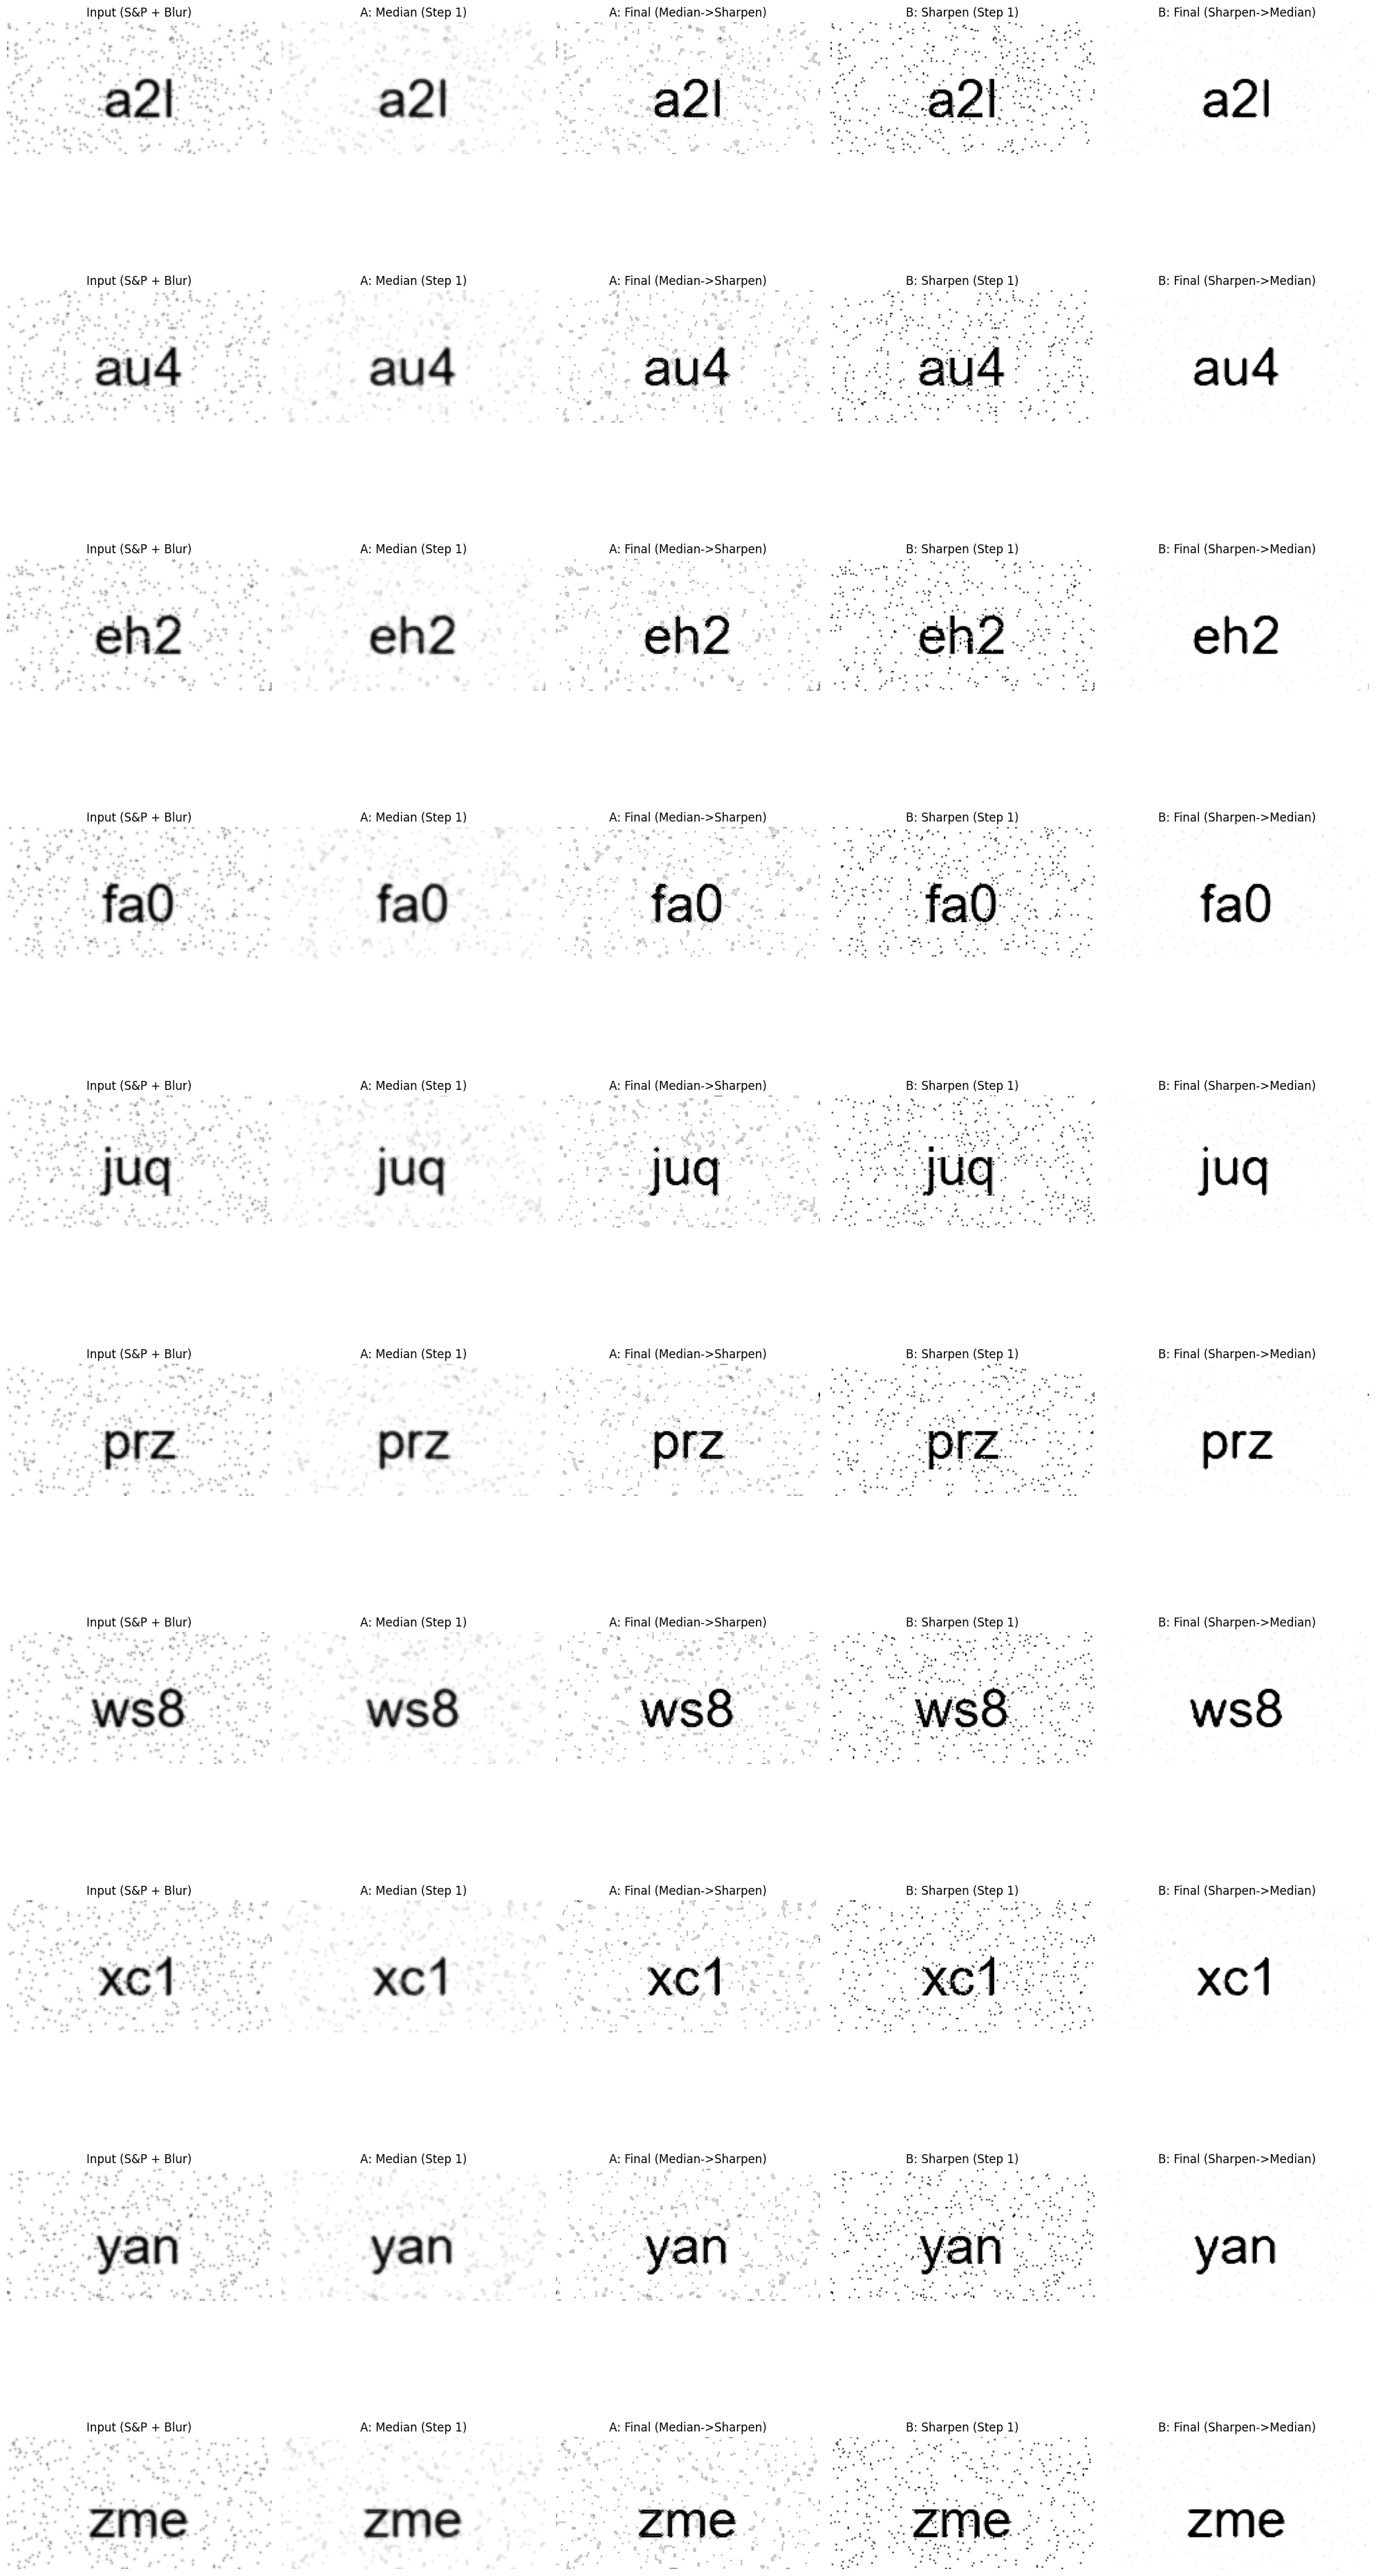

In [2]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2 # For OpenCV operations

# ---------------------------------------------------
# 1. Define Paths
# ---------------------------------------------------
BASE_DIR = '.'
OUTPUT_BASE = os.path.join(BASE_DIR, 'outputs')

# Input directory (Noisy + Blurred images from previous step)
INPUT_DIR_BLUR = os.path.join(OUTPUT_BASE, 'Captcha_SaltPepper_Blur')

# --- Output Directories for Both Methods ---
# Method A: Median -> Sharpen
OUTPUT_DIR_A = os.path.join(OUTPUT_BASE, 'Captcha_Final_Median_Sharpen')
# Method B: Sharpen -> Median
OUTPUT_DIR_B = os.path.join(OUTPUT_BASE, 'Captcha_Final_Sharpen_Median')

# Create the final output directories
os.makedirs(OUTPUT_DIR_A, exist_ok=True)
os.makedirs(OUTPUT_DIR_B, exist_ok=True)

print(f"Reading images from: {INPUT_DIR_BLUR}")
print(f"Saving Method A (Median->Sharpen) to: {OUTPUT_DIR_A}")
print(f"Saving Method B (Sharpen->Median) to: {OUTPUT_DIR_B}")

# ---------------------------------------------------
# 2. Define Sharpening Kernel
# ---------------------------------------------------
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# ---------------------------------------------------
# 3. Find and Process Images (Both Pipelines)
# ---------------------------------------------------
image_paths = sorted(glob.glob(os.path.join(INPUT_DIR_BLUR, '*.png')))
images_to_display = []

print(f"Found {len(image_paths)} images to process...")

if len(image_paths) > 0:
    for img_path in image_paths:
        filename = os.path.basename(img_path)

        # 1. Read the noisy-and-blurred image (as PIL)
        noisy_blur_img_pil = Image.open(img_path)

        # 2. Convert PIL (RGB) to OpenCV (BGR) format for processing
        noisy_blur_img_np = np.array(noisy_blur_img_pil)
        noisy_blur_img_bgr = cv2.cvtColor(noisy_blur_img_np, cv2.COLOR_RGB2BGR)


        # --- Pipeline A: Median -> Sharpen ---
        median_A_bgr = cv2.medianBlur(noisy_blur_img_bgr, 3)
        final_A_bgr = cv2.filter2D(src=median_A_bgr, ddepth=-1, kernel=sharpen_kernel)
        # Save final result for Method A
        cv2.imwrite(os.path.join(OUTPUT_DIR_A, filename), final_A_bgr)


        # --- Pipeline B: Sharpen -> Median ---
        sharpen_B_bgr = cv2.filter2D(src=noisy_blur_img_bgr, ddepth=-1, kernel=sharpen_kernel)
        final_B_bgr = cv2.medianBlur(sharpen_B_bgr, 3)
        # Save final result for Method B
        cv2.imwrite(os.path.join(OUTPUT_DIR_B, filename), final_B_bgr)


        # --- 4. Prepare all images for display (Convert to RGB) ---
        median_A_rgb = cv2.cvtColor(median_A_bgr, cv2.COLOR_BGR2RGB)
        final_A_rgb = cv2.cvtColor(final_A_bgr, cv2.COLOR_BGR2RGB)

        sharpen_B_rgb = cv2.cvtColor(sharpen_B_bgr, cv2.COLOR_BGR2RGB)
        final_B_rgb = cv2.cvtColor(final_B_bgr, cv2.COLOR_BGR2RGB)

        # Add all 5 stages to the display list
        images_to_display.append((
            noisy_blur_img_pil, # Input
            median_A_rgb,       # Method A, Step 1
            final_A_rgb,        # Method A, Final
            sharpen_B_rgb,      # Method B, Step 1
            final_B_rgb         # Method B, Final
        ))

    print("Processing complete. All images for both methods saved.")
else:
    print("No images found in the directory.")

# ---------------------------------------------------
# 5. Display Comprehensive Results
# ---------------------------------------------------
print("\nDisplaying comparison results...")

num_images = len(images_to_display)

if num_images > 0:
    # Create a display plot with 5 columns
    fig, axes = plt.subplots(num_images, 5, figsize=(20, num_images * 4))

    if num_images == 1:
        axes = np.array([axes])

    for i, (img_input, img_A1, img_A_final, img_B1, img_B_final) in enumerate(images_to_display):

        # Column 1: Input
        axes[i, 0].imshow(img_input)
        axes[i, 0].set_title(f'Input (S&P + Blur)')
        axes[i, 0].axis('off')

        # --- Method A ---
        # Column 2: A - Step 1
        axes[i, 1].imshow(img_A1)
        axes[i, 1].set_title('A: Median (Step 1)')
        axes[i, 1].axis('off')

        # Column 3: A - Final
        axes[i, 2].imshow(img_A_final)
        axes[i, 2].set_title('A: Final (Median->Sharpen)')
        axes[i, 2].axis('off')

        # --- Method B ---
        # Column 4: B - Step 1
        axes[i, 3].imshow(img_B1)
        axes[i, 3].set_title('B: Sharpen (Step 1)')
        axes[i, 3].axis('off')

        # Column 5: B - Final
        axes[i, 4].imshow(img_B_final)
        axes[i, 4].set_title('B: Final (Sharpen->Median)')
        axes[i, 4].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")

Reading images from: ./outputs/Captcha_Final_Sharpen_Median
Saving final binary images to: ./outputs/Captcha_Final_Binary_Cleaned
Noise removal threshold set to: 15 pixels
Found 10 images to process...
Processing complete. All cleaned binary images saved.

Displaying results...


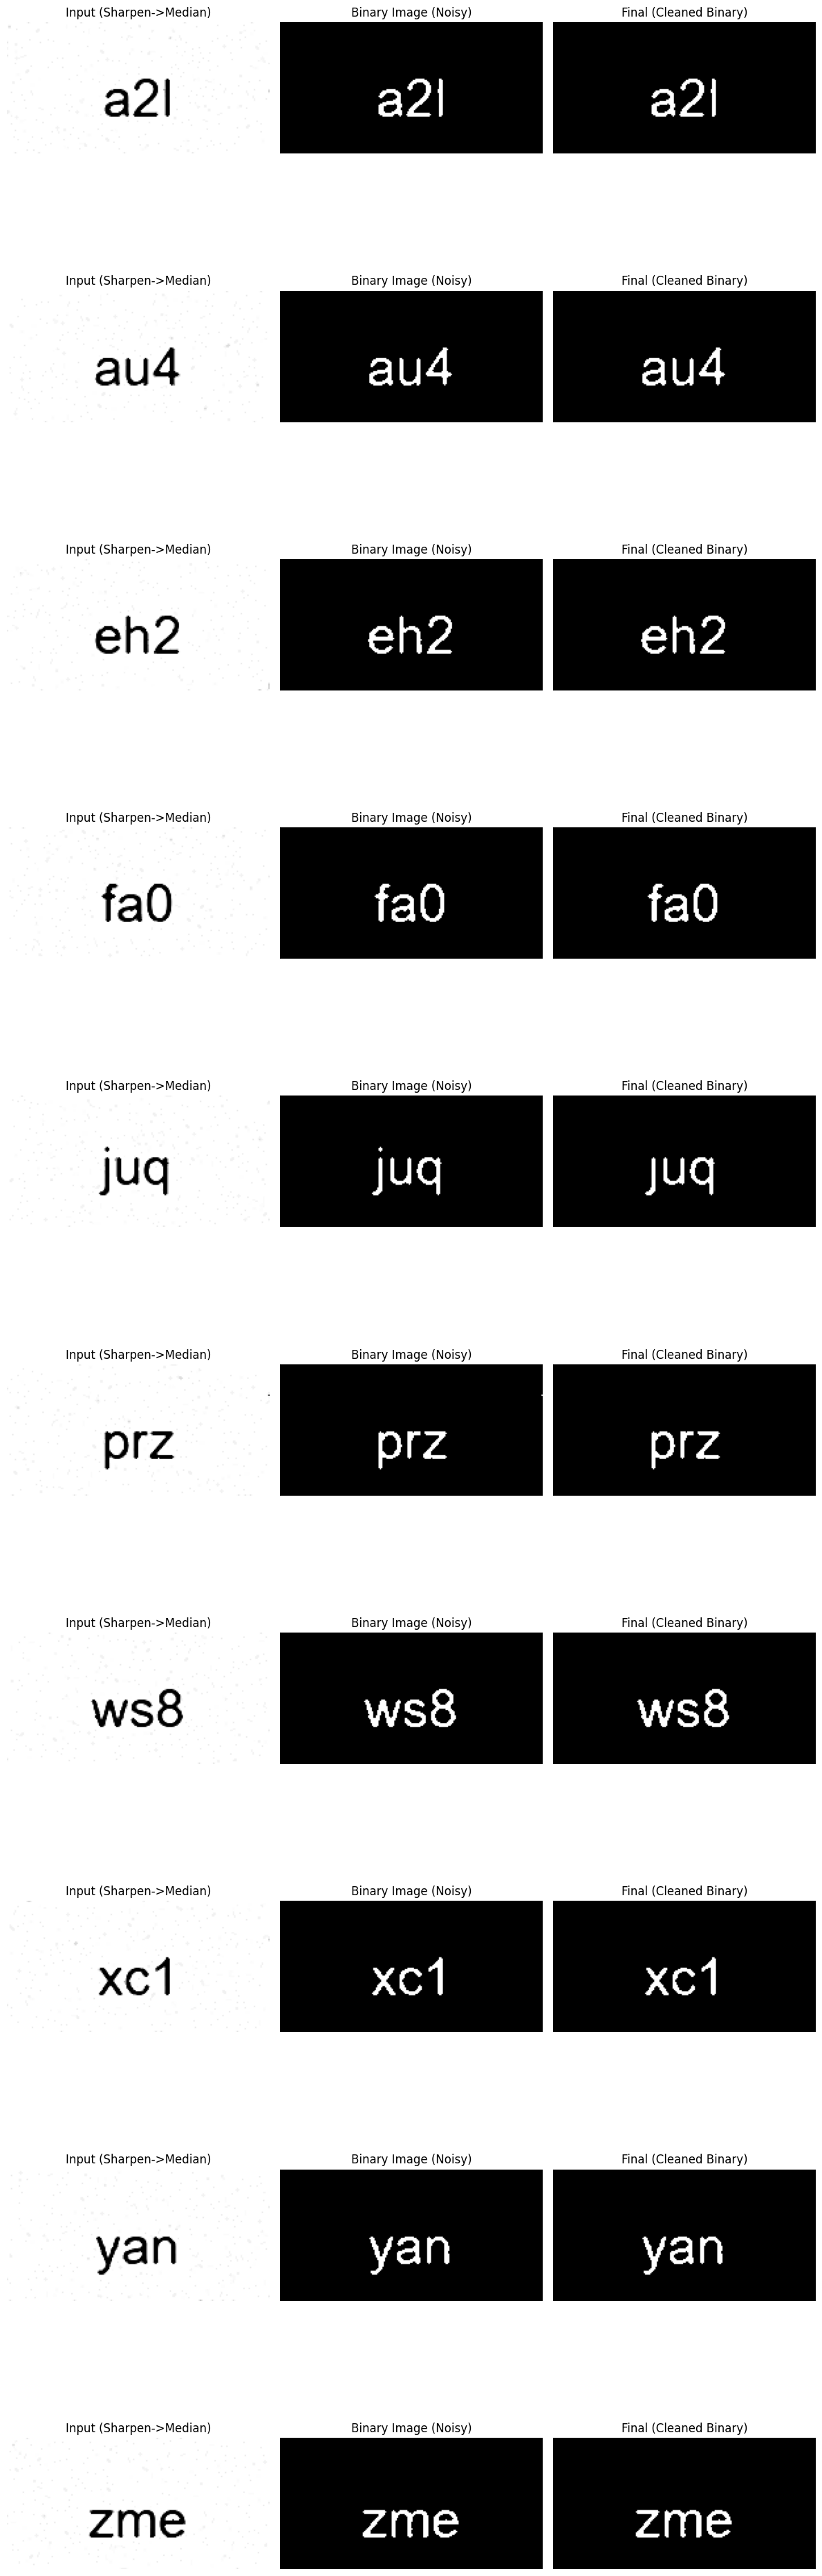

In [3]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2 # For OpenCV operations

# ---------------------------------------------------
# 1. Define Paths
# ---------------------------------------------------
BASE_DIR = '.'
OUTPUT_BASE = os.path.join(BASE_DIR, 'outputs')

# Input directory (Result from Sharpen -> Median)
INPUT_DIR = os.path.join(OUTPUT_BASE, 'Captcha_Final_Sharpen_Median')

# Final output directory for cleaned binary images
OUTPUT_DIR_BINARY = os.path.join(OUTPUT_BASE, 'Captcha_Final_Binary_Cleaned')

# Create the final output directory
os.makedirs(OUTPUT_DIR_BINARY, exist_ok=True)

print(f"Reading images from: {INPUT_DIR}")
print(f"Saving final binary images to: {OUTPUT_DIR_BINARY}")

# ---------------------------------------------------
# 2. Define Noise Filter Threshold
# ---------------------------------------------------
# We will remove all components (blobs) smaller than this area
MIN_AREA_THRESHOLD = 15
print(f"Noise removal threshold set to: {MIN_AREA_THRESHOLD} pixels")

# ---------------------------------------------------
# 3. Find and Process Images
# ---------------------------------------------------
image_paths = sorted(glob.glob(os.path.join(INPUT_DIR, '*.png')))
images_to_display = []

print(f"Found {len(image_paths)} images to process...")

if len(image_paths) > 0:
    for img_path in image_paths:
        filename = os.path.basename(img_path)

        # 1. Read the image using OpenCV (it's BGR)
        img_bgr = cv2.imread(img_path)

        # 2. Convert to Grayscale
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

        # 3. Binarize the image
        # We use THRESH_OTSU to auto-find the best threshold
        # We use THRESH_BINARY_INV to make text WHITE (255) and background BLACK (0)
        # This is required for connectedComponents
        thresh_val, img_binary = cv2.threshold(
            img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
        )

        # 4. Find all connected components (blobs)
        # This gives us stats, including the area of each blob
        num_labels, labels_matrix, stats, centroids = cv2.connectedComponentsWithStats(
            img_binary, connectivity=8
        )

        # 5. Create a new, clean image (all black)
        img_cleaned = np.zeros_like(img_binary)

        # 6. Filter out small noise components
        # We start from i=1 (label 0 is the background)
        for i in range(1, num_labels):
            # Get the area of this component
            area = stats[i, cv2.CC_STAT_AREA]

            # If the area is larger than our threshold, keep it
            if area >= MIN_AREA_THRESHOLD:
                # Add this component to our clean image
                img_cleaned[labels_matrix == i] = 255

        # 7. Save the final cleaned image
        cv2.imwrite(os.path.join(OUTPUT_DIR_BINARY, filename), img_cleaned)

        # 8. Prepare images for display (Matplotlib needs RGB)
        # Input (read as PIL for correct RGB)
        input_pil = Image.open(img_path)
        # "Before" - the noisy binary image
        img_binary_rgb = cv2.cvtColor(img_binary, cv2.COLOR_GRAY2RGB)
        # "After" - the cleaned binary image
        img_cleaned_rgb = cv2.cvtColor(img_cleaned, cv2.COLOR_GRAY2RGB)

        images_to_display.append((input_pil, img_binary_rgb, img_cleaned_rgb))

    print("Processing complete. All cleaned binary images saved.")
else:
    print("No images found in the directory.")

# ---------------------------------------------------
# 4. Display Results
# ---------------------------------------------------
print("\nDisplaying results...")

num_images = len(images_to_display)

if num_images > 0:
    # Create a display plot with 3 columns
    fig, axes = plt.subplots(num_images, 3, figsize=(12, num_images * 4))

    if num_images == 1:
        axes = np.array([axes])

    for i, (img_input, img_binary, img_cleaned) in enumerate(images_to_display):

        # Column 1: Input (from previous step)
        axes[i, 0].imshow(img_input)
        axes[i, 0].set_title(f'Input (Sharpen->Median)')
        axes[i, 0].axis('off')

        # Column 2: "Before" (Noisy Binary)
        axes[i, 1].imshow(img_binary)
        axes[i, 1].set_title('Binary Image (Noisy)')
        axes[i, 1].axis('off')

        # Column 3: "After" (Cleaned Binary)
        axes[i, 2].imshow(img_cleaned)
        axes[i, 2].set_title('Final (Cleaned Binary)')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")

# Part 3: Extracting and Resizing Characters

Reading images from: ./outputs/Captcha_Final_Binary_Cleaned
Saving extracted characters to: ./outputs/Captcha_Extracted_Characters
Found 10 images to process...

--- Processing Complete ---

--- EXTRACTION REPORT ---
Extracted 3 characters from a2l_04.png (saved in 'a2l_04' folder)
Extracted 3 characters from au4_05.png (saved in 'au4_05' folder)
Extracted 3 characters from eh2_09.png (saved in 'eh2_09' folder)
Extracted 3 characters from fa0_08.png (saved in 'fa0_08' folder)
Extracted 3 characters from juq_02.png (saved in 'juq_02' folder)
Extracted 3 characters from prz_00.png (saved in 'prz_00' folder)
Extracted 3 characters from ws8_07.png (saved in 'ws8_07' folder)
Extracted 3 characters from xc1_01.png (saved in 'xc1_01' folder)
Extracted 3 characters from yan_03.png (saved in 'yan_03' folder)
Extracted 3 characters from zme_06.png (saved in 'zme_06' folder)

--- Displaying Extracted Characters (Sample) ---


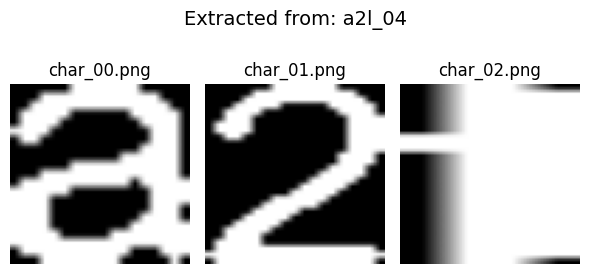

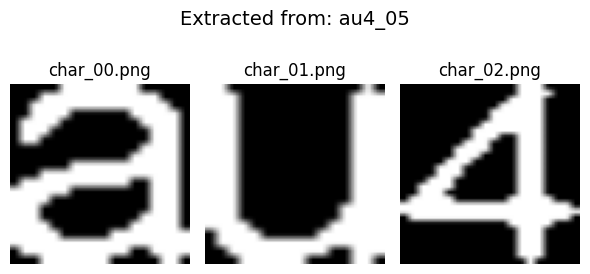

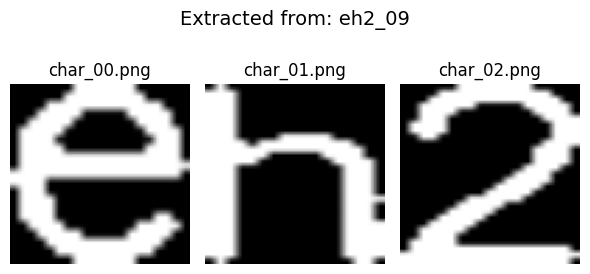

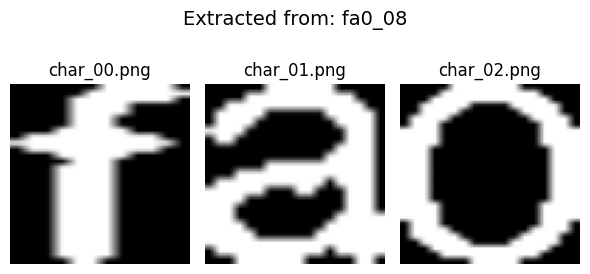

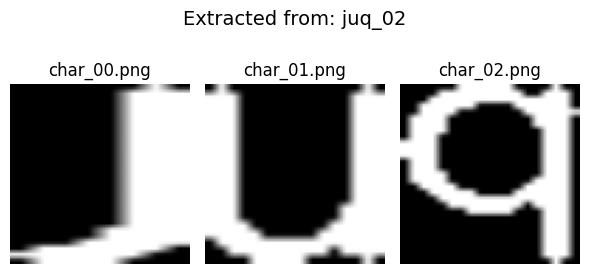

In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2 # For OpenCV operations

# ---------------------------------------------------
# 1. Define Paths
# ---------------------------------------------------
BASE_DIR = '.'
OUTPUT_BASE = os.path.join(BASE_DIR, 'outputs')

# Input directory (Cleaned Binary Images)
INPUT_DIR_BINARY = os.path.join(OUTPUT_BASE, 'Captcha_Final_Binary_Cleaned')

# Main output directory for ALL extracted characters
OUTPUT_DIR_CHARS = os.path.join(OUTPUT_BASE, 'Captcha_Extracted_Characters')

# Create the main output directory
os.makedirs(OUTPUT_DIR_CHARS, exist_ok=True)

print(f"Reading images from: {INPUT_DIR_BINARY}")
print(f"Saving extracted characters to: {OUTPUT_DIR_CHARS}")

# ---------------------------------------------------
# 2. Define Processing Parameters
# ---------------------------------------------------
MIN_AREA_THRESHOLD = 15
TARGET_SIZE = 64

# ---------------------------------------------------
# 3. Find, Process, Extract, and Save Characters
# ---------------------------------------------------
image_paths = sorted(glob.glob(os.path.join(INPUT_DIR_BINARY, '*.png')))
extraction_report = [] # To store report lines
subfolders_created = [] # To store paths for display

print(f"Found {len(image_paths)} images to process...")

if len(image_paths) > 0:
    for img_path in image_paths:
        filename = os.path.basename(img_path)
        basename, ext = os.path.splitext(filename)

        # --- Create a Subfolder for this image ---
        char_subfolder = os.path.join(OUTPUT_DIR_CHARS, basename)
        os.makedirs(char_subfolder, exist_ok=True)
        subfolders_created.append(char_subfolder) # Add to list for display

        # 1. Read the binary image (as grayscale)
        img_binary = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # 2. Find all connected components
        num_labels, labels_matrix, stats, centroids = cv2.connectedComponentsWithStats(
            img_binary, connectivity=8
        )

        char_count = 0

        # 3. Loop through components (sorted by x-position)
        components = []
        for i in range(1, num_labels):
            area = stats[i, cv2.CC_STAT_AREA]
            if area >= MIN_AREA_THRESHOLD:
                x = stats[i, cv2.CC_STAT_LEFT]
                components.append((x, i))

        components.sort()

        # 4. Process and save the sorted components
        for x, label_index in components:
            x = stats[label_index, cv2.CC_STAT_LEFT]
            y = stats[label_index, cv2.CC_STAT_TOP]
            w = stats[label_index, cv2.CC_STAT_WIDTH]
            h = stats[label_index, cv2.CC_STAT_HEIGHT]

            # 5. Crop the character
            char_crop = img_binary[y:y+h, x:x+w]

            # 6. --- MODIFIED HERE ---
            # Directly resize the crop to 64x64, stretching it
            char_resized = cv2.resize(char_crop, (TARGET_SIZE, TARGET_SIZE))

            # 7. Save the character
            save_name = f"char_{char_count:02d}.png"
            save_path = os.path.join(char_subfolder, save_name)
            cv2.imwrite(save_path, char_resized)

            char_count += 1

        # Add to our report
        extraction_report.append(f"Extracted {char_count} characters from {filename} (saved in '{basename}' folder)")

    print("\n--- Processing Complete ---")

    # --- 5. Print the Final Report ---
    print("\n--- EXTRACTION REPORT ---")
    if extraction_report:
        for line in extraction_report:
            print(line)
    else:
        print("No images were processed.")

else:
    print("No images found in the directory.")


# ---------------------------------------------------
# 6. Display Results
# ---------------------------------------------------
print("\n--- Displaying Extracted Characters (Sample) ---")

# Limit the display to the first 5 processed images
subfolders_to_show = sorted(list(set(subfolders_created)))[:5]

if not subfolders_to_show:
    print("No extracted characters found to display.")
else:
    for subfolder_path in subfolders_to_show:
        subfolder_name = os.path.basename(subfolder_path)

        # Find all the char images we just saved
        char_paths = sorted(glob.glob(os.path.join(subfolder_path, 'char_*.png')))

        if not char_paths:
            print(f"No characters displayed for {subfolder_name} (list was empty).")
            continue

        # Read the images
        char_images = [cv2.imread(p, cv2.IMREAD_GRAYSCALE) for p in char_paths]

        # Create a plot for them
        num_chars = len(char_images)
        fig, axes = plt.subplots(1, num_chars, figsize=(num_chars * 2, 3))

        # Set a title for the whole row
        fig.suptitle(f"Extracted from: {subfolder_name}", fontsize=14)

        if num_chars == 1:
            axes = [axes] # Make it iterable

        for ax, img, path in zip(axes, char_images, char_paths):
            ax.imshow(img, cmap='gray')
            ax.set_title(os.path.basename(path))
            ax.axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
        plt.show()

# Part 4: Character Identification using Template Matching

Loading Templates from: ./assets/Mapset
Reading Character Folders from: ./outputs/Captcha_Extracted_Characters
Loading 36 templates...

--- Starting Character Recognition ---

--- Recognition Complete. Saving CSVs. ---

--- DISPLAYING RESULTS ---



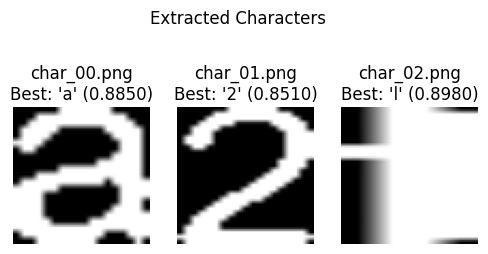

Character_File Best_Match Correlation_Score
0    char_00.png          a            0.8850
1    char_01.png          2            0.8510
2    char_02.png          l            0.8980


----------------------------------------



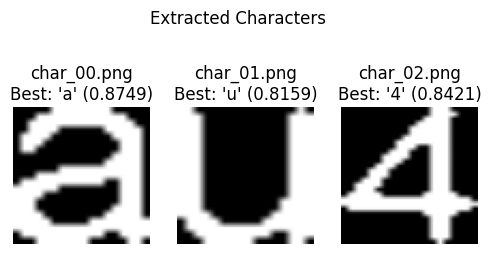

Character_File Best_Match Correlation_Score
0    char_00.png          a            0.8749
1    char_01.png          u            0.8159
2    char_02.png          4            0.8421


----------------------------------------



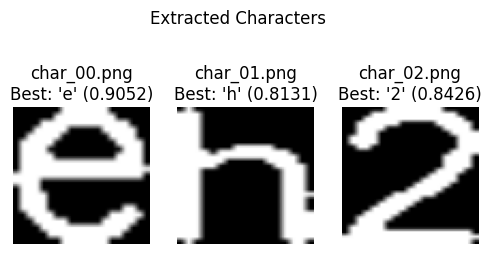

Character_File Best_Match Correlation_Score
0    char_00.png          e            0.9052
1    char_01.png          h            0.8131
2    char_02.png          2            0.8426


----------------------------------------



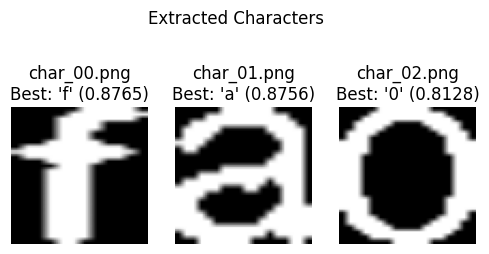

Character_File Best_Match Correlation_Score
0    char_00.png          f            0.8765
1    char_01.png          a            0.8756
2    char_02.png          0            0.8128


----------------------------------------



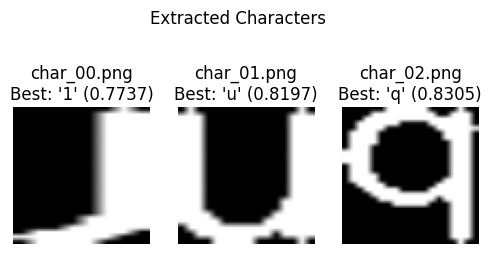

Character_File Best_Match Correlation_Score
0    char_00.png          1            0.7737
1    char_01.png          u            0.8197
2    char_02.png          q            0.8305


----------------------------------------



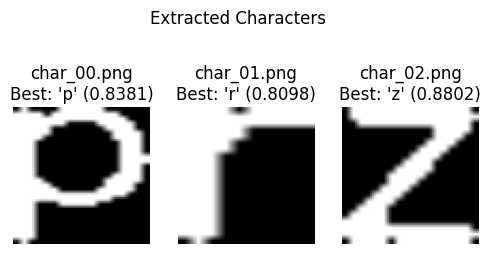

Character_File Best_Match Correlation_Score
0    char_00.png          p            0.8381
1    char_01.png          r            0.8098
2    char_02.png          z            0.8802


----------------------------------------



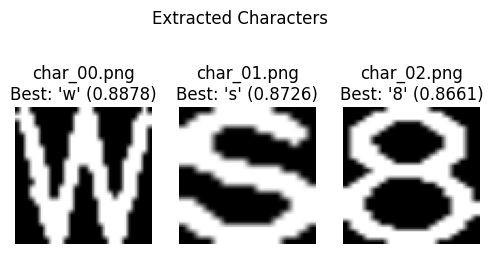

Character_File Best_Match Correlation_Score
0    char_00.png          w            0.8878
1    char_01.png          s            0.8726
2    char_02.png          8            0.8661


----------------------------------------



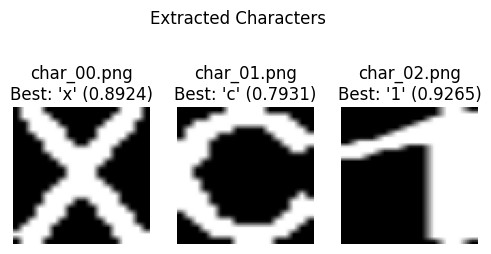

Character_File Best_Match Correlation_Score
0    char_00.png          x            0.8924
1    char_01.png          c            0.7931
2    char_02.png          1            0.9265


----------------------------------------



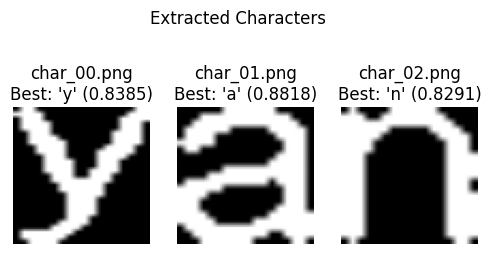

Character_File Best_Match Correlation_Score
0    char_00.png          y            0.8385
1    char_01.png          a            0.8818
2    char_02.png          n            0.8291


----------------------------------------



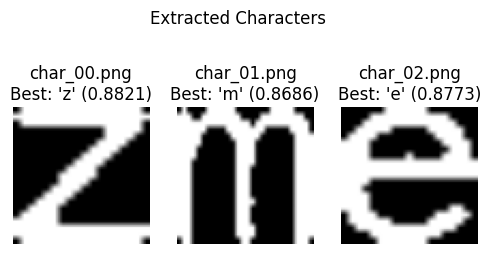

Character_File Best_Match Correlation_Score
0    char_00.png          z            0.8821
1    char_01.png          m            0.8686
2    char_02.png          e            0.8773


----------------------------------------


In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2 # For OpenCV operations
import csv # For writing CSV files
import pandas as pd # For displaying the table nicely
from IPython.display import display, HTML

# ---------------------------------------------------
# 1. Define Paths
# ---------------------------------------------------
BASE_DIR = '.'
OUTPUT_BASE = os.path.join(BASE_DIR, 'outputs')

# Input 1: The Character Templates (Masks)
# Note: Mapset is an input, so it should be in assets
MAPSET_DIR = os.path.join(BASE_DIR, 'assets', 'Mapset')

# Input 2: The Extracted Characters (in subfolders)
CHARS_DIR = os.path.join(OUTPUT_BASE, 'Captcha_Extracted_Characters')

print(f"Loading Templates from: {MAPSET_DIR}")
print(f"Reading Character Folders from: {CHARS_DIR}")

# ---------------------------------------------------
# 2. Load All Templates (Mapset) into Memory
# ---------------------------------------------------
templates = {} # A dictionary to hold templates: {'a': img_a, 'b': img_b, ...}
template_paths = glob.glob(os.path.join(MAPSET_DIR, '*.png'))

if not template_paths:
    print(f"FATAL ERROR: No template images found in {MAPSET_DIR}")
    print("Please check that you have the 'Mapset' folder inside 'assets'.")
else:
    print(f"Loading {len(template_paths)} templates...")
    for path in template_paths:
        # Get the character name from the filename (e.g., "a.png" -> "a")
        char_name = os.path.splitext(os.path.basename(path))[0]
        # Read the template image as grayscale
        template_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if template_img is not None:
            templates[char_name] = template_img
        else:
            print(f"Warning: Could not read template {path}")

# ---------------------------------------------------
# 3. Main Processing Loop
# ---------------------------------------------------
print("\n--- Starting Character Recognition ---")

# Find all subfolders (e.g., '.../abc_01', '.../xyz_02')
subfolder_paths = sorted(glob.glob(os.path.join(CHARS_DIR, '*/')))
display_data_all = [] # To hold data for the final display

if not subfolder_paths:
    print(f"FATAL ERROR: No subfolders found in {CHARS_DIR}")

for subfolder_path in subfolder_paths:
    subfolder_name = os.path.basename(os.path.normpath(subfolder_path))

    # Find all extracted characters in this subfolder
    char_paths = sorted(glob.glob(os.path.join(subfolder_path, 'char_*.png')))

    if not char_paths:
        print(f"Skipping empty folder: {subfolder_name}")
        continue

    csv_data = [] # Data for this subfolder's CSV
    display_chars = [] # Images for this subfolder's display

    # Add CSV Header
    csv_data.append(['Character_File', 'Best_Match', 'Correlation_Score'])

    # 4. Iterate through each character in the subfolder
    for char_path in char_paths:
        char_filename = os.path.basename(char_path)

        # Read the extracted character
        char_img = cv2.imread(char_path, cv2.IMREAD_GRAYSCALE)
        if char_img is None:
            continue

        display_chars.append(char_img) # Add for display

        # Initialize best match search
        best_score = -1.0 # Use -1.0 since scores are 0-1
        best_match_name = 'Unknown'

        # 5. Compare this character against all templates
        for template_name, template_img in templates.items():

            # Use Normalized Cross-Correlation
            result = cv2.matchTemplate(char_img, template_img, cv2.TM_CCORR_NORMED)

            # Since images are 1-to-1, result is a 1x1 array
            _minVal, maxVal, _minLoc, _maxLoc = cv2.minMaxLoc(result)
            score = maxVal

            if score > best_score:
                best_score = score
                best_match_name = template_name

        # 6. Store the best match result
        csv_data.append([char_filename, best_match_name, f"{best_score:.4f}"])

    # 7. Write the CSV file for this subfolder
    csv_filename = os.path.join(subfolder_path, f"{subfolder_name}_results.csv")
    try:
        with open(csv_filename, 'w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerows(csv_data)
    except Exception as e:
        print(f"Error writing CSV {csv_filename}: {e}")

    # 8. Store data for the final display
    display_data_all.append({
        'name': subfolder_name,
        'chars': display_chars,
        'table': csv_data
    })

print("\n--- Recognition Complete. Saving CSVs. ---")


# ---------------------------------------------------
# 4. Display Final Results
# ---------------------------------------------------
print("\n--- DISPLAYING RESULTS ---")

if not display_data_all:
    print("No results to display.")
else:
    for item in display_data_all:
        print("\n" + "="*40)
        display(HTML(f"<h3>Results for: {item['name']}</h3>"))
        print("="*40)

        # --- Display Characters ---
        num_chars = len(item['chars'])
        if num_chars > 0:
            fig, axes = plt.subplots(1, num_chars, figsize=(num_chars * 2, 3))
            fig.suptitle(f"Extracted Characters", y=1.05)
            if num_chars == 1: axes = [axes] # Make iterable

            for ax, img, data_row in zip(axes, item['chars'], item['table'][1:]):
                ax.imshow(img, cmap='gray')
                # Title: 'char_00.png' -> Best: 'x' (0.98)
                ax.set_title(f"{data_row[0]}\nBest: '{data_row[1]}' ({data_row[2]})")
                ax.axis('off')
            plt.show()

        # --- Display Table (CSV Data) ---
        if len(item['table']) > 1: # Check if there is data beyond the header
            # Convert to pandas DataFrame for pretty display
            df = pd.DataFrame(item['table'][1:], columns=item['table'][0])
            display(df)
        else:
            print("No recognition data to display for this item.")

        print("\n" + "-"*40)